# Disease Prediction Model

Ángel Fabián Nodarse Díaz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Exploración Inicial 

In [2]:
df = pd.read_csv('Training.csv')
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


Esta predicción sera una tarea de clasificación basandose en 132 síntomas 

In [3]:
df.shape

(4920, 134)

El dataframe cuenta con 4920 observaciones para 134 características contando la que se va a predecir

In [4]:
df.prognosis.nunique()

41

Las enfermedades a predecir pueden ser 41 que son las siguientes...

In [5]:
df.prognosis.unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

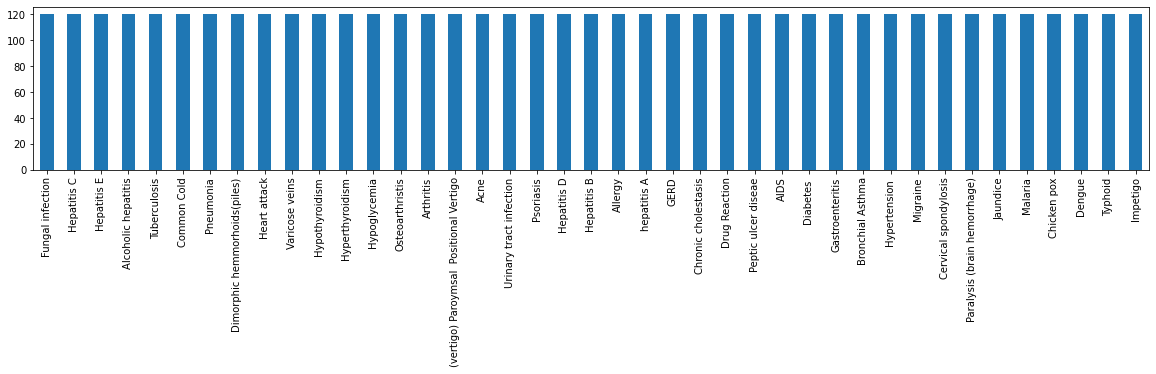

In [6]:
plt.figure(figsize=(20,3))
df['prognosis'].value_counts().plot(kind='bar')
plt.show()

Se puede observar que existe un igual número de oservaciones para cada una de las enefrmedades que se van a predecir, así entonces se puede decir que es un dataset muy estable y proporcionado para hacer una predicción consistente y concluyente

In [7]:
df.groupby('prognosis').mean()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
prognosis,,,,,,,,,,,,,,,,,,,,,
(vertigo) Paroymsal Positional Vertigo,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
AIDS,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
Acne,0.00,0.95,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.9,0.9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
Alcoholic hepatitis,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
Allergy,0.00,0.00,0.0,0.90,0.9,0.90,0.00,0.00,0.00,0.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
Arthritis,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
Bronchial Asthma,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
Cervical spondylosis,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
Chicken pox,0.95,0.95,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN


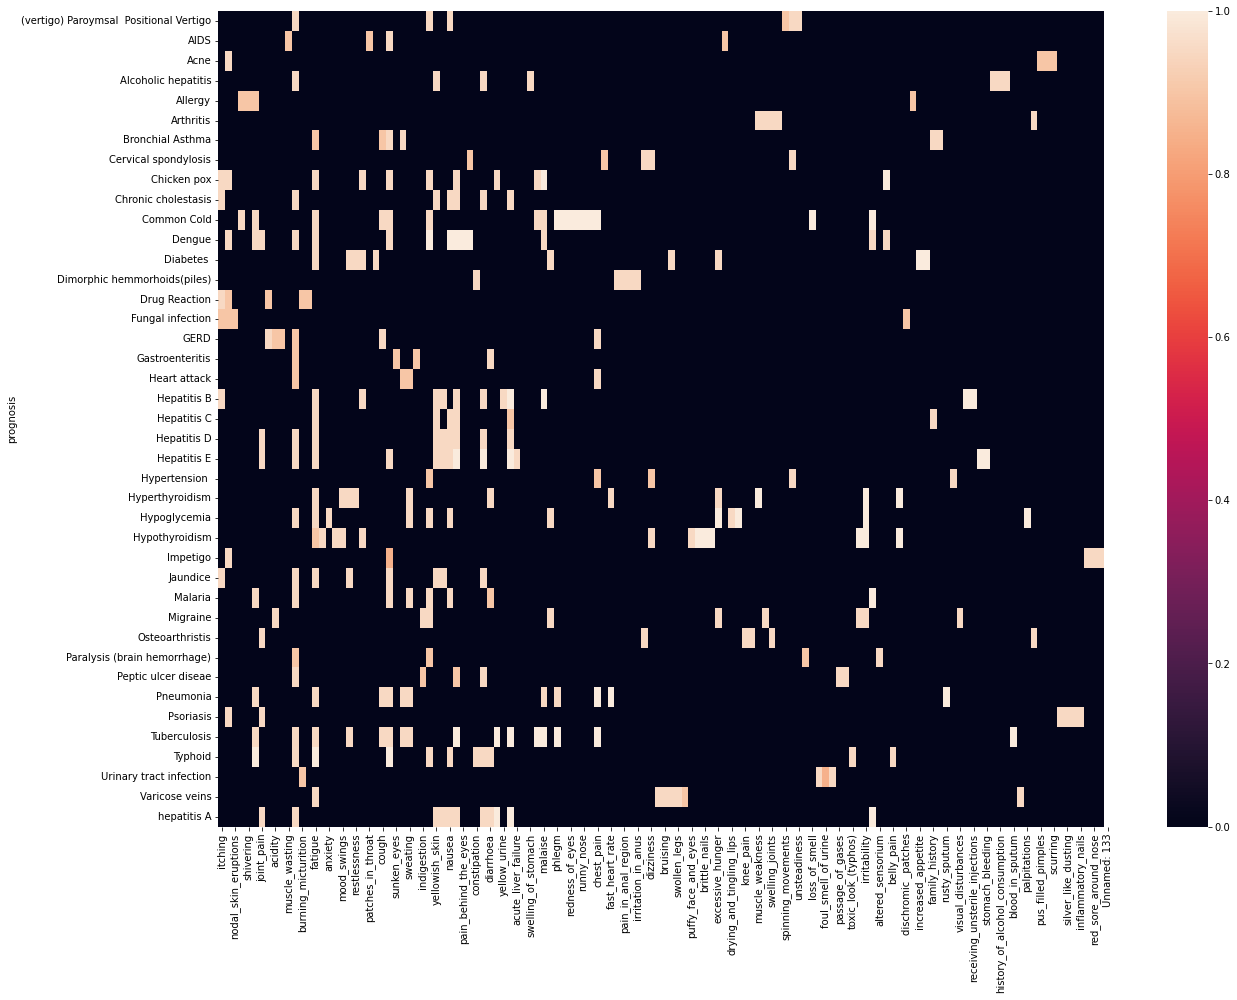

In [19]:
plt.figure(figsize=(20,15))
sns.heatmap(df.groupby('prognosis').mean())
plt.show()

## 2. Preprocesamiento, selección y extracción de características

## 3. Evaluación y selección de modelos

## 4. Ajuste de Hiperparámetros

## 5. Evaluación final

## 6. Análisis final